<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/%EC%A0%84%EA%B8%B0%EC%9E%90%EB%8F%99%EC%B0%A8_%EC%B9%9C%ED%99%98%EA%B2%BD%EC%97%90%EB%84%88%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
df1=pd.read_csv('/content/2021년_05월_자동차_등록자료_통계.csv',index_col=0,encoding='cp949')
df1.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
차 종 별,,,,,,,,,,,,,,,,,,
총계,"3,160,629","1,444,108","1,216,753","1,674,508","693,698","687,234","578,127","179,241","6,087,478","815,883","876,158","1,160,139","952,275","1,133,090","1,486,529","1,808,091","633,402","24,587,343"
승용차합계,"2,719,601","1,205,710","1,026,251","1,425,254","579,235","579,013","489,724","157,669","5,046,930","624,313","684,305","890,375","728,929","840,881","1,111,868","1,454,514","532,121","20,096,693"
승용일반형 계,"1,923,578","840,348","727,549","937,196","399,360","408,811","326,585","108,956","3,395,035","406,711","461,726","595,030","487,086","543,748","767,536","1,006,929","332,736","13,668,920"
승용일반형 국산 소계,"1,496,239","676,025","593,445","773,800","345,797","360,719","300,221","93,427","2,873,894","368,423","415,820","538,770","432,791","496,492","704,687","895,026","306,809","11,672,385"
승용일반형 국산 800CC미만,"11,484","6,536","6,852","7,659","2,498","4,180","3,509",739,"28,025","6,152","5,245","6,550","4,985","5,499","12,635","16,490","3,494","132,532"


In [ ]:
df_car_jeju=df1.loc[['승용일반형 계','승용일반형 국산 전기','승용일반형 외산 전기','승용다목적형 전기','승용기타형 전기'],['제주']]
df_car_jeju['제주']=df_car_jeju['제주'].str.replace(',','').astype({'제주': 'int64'})
df3=pd.DataFrame([df_car_jeju.loc['승용일반형 계'] -df_car_jeju.loc['승용일반형 국산 전기']-df_car_jeju.loc['승용일반형 외산 전기']-df_car_jeju.loc['승용다목적형 전기']-df_car_jeju.loc['승용기타형 전기']],
                 index=['승용 전기 제외'] )
df_car_jeju=df_car_jeju.append(df3)
df_jeju_electric=df_car_jeju.iloc[1:]
df_jeju_electric

,제주
승용일반형 국산 전기,2926
승용일반형 외산 전기,1951
승용다목적형 전기,5275
승용기타형 전기,2204
승용 전기 제외,320380


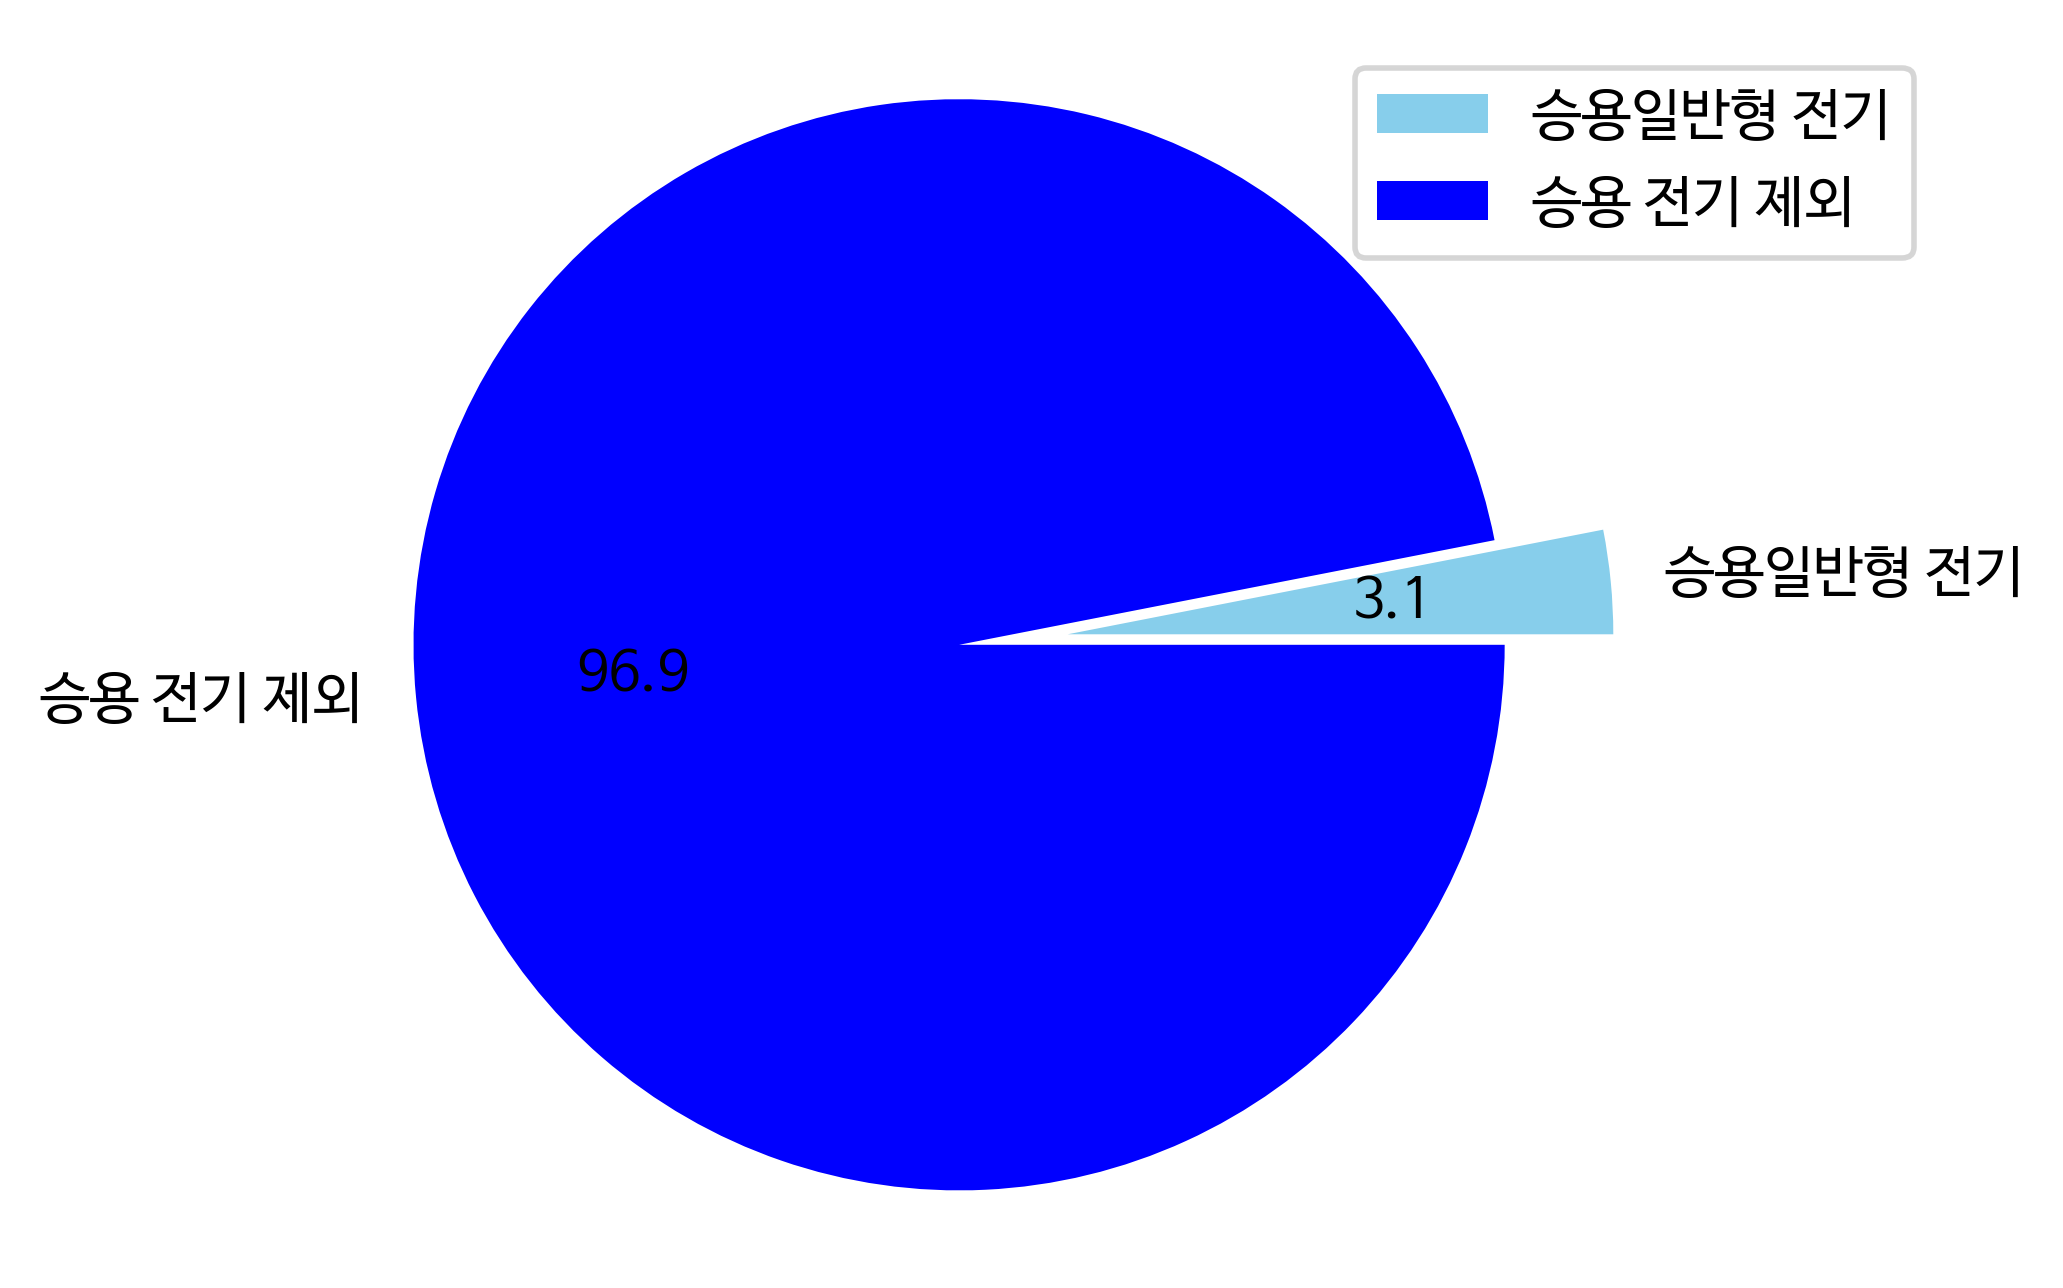

In [ ]:
color = ['skyblue', 'blue']
size=[10152,320380]
label = ['승용일반형 전기','승용 전기 제외']
plt.figure(dpi=200)
plt.pie(size,labels=label,autopct='%.1f',colors=color,explode=(0,0.2))
plt.axis('equal')
plt.legend()

In [ ]:
 df_jeju_energy = pd.read_csv('/content/제주특별자치도_신재생에너지발전시설현황_20200120.csv',encoding='cp949')
df_jeju_energy.head()

,허가일자,상호,설비용량(KW),설치행정시,설치지역,원동력종류,사업개시일,구분,데이터기준일자
0,2018-04-04,(유)나월(나월태양광발전소),496.8,제주시,애월읍,태양광,2019-04-26,육상,2020-01-20
1,2014-10-07,(유)메가솔라 태양광발전소,1800.0,제주시,구좌읍,태양광,2015-07-01,없음,2020-01-20
2,2014-05-15,(유)무한에코에너지(서민행복8호태양광발전소),516.0,서귀포시,남원읍,태양광,2014-10-16,없음,2020-01-20
3,2014-12-09,(유)용흥마을태양광발전소,99.0,서귀포시,강정동,태양광,2015-10-29,없음,2020-01-20
4,2014-10-14,(유)제주 늘해랑,2198.0,서귀포시,성산읍,태양광,2019-01-31,없음,2020-01-20


In [ ]:
df_jeju_energy
df_jeju_kw=df_jeju_energy.loc[:,['원동력종류','설비용량(KW)']]

In [ ]:
 # 1kwh를 1시간동안 사용하면 1kw
 df_jeju_kw

,원동력종류,설비용량(KW)
0,태양광,496.80
1,태양광,1800.00
2,태양광,516.00
3,태양광,99.00
4,태양광,2198.00
...,...,...
836,태양광,93.15
837,태양광,99.00
838,태양광,99.28
839,태양광,99.28


In [ ]:
df_battery_kwh = pd.read_csv('/content/한국전력공사_전기차량 모델별 충전타입 및 연비 등 정보_20201008.csv',encoding = 'cp949')
df_battery_kwh=df_battery_kwh.dropna()
df_battery_kwh

,모델명,급속충전방식,완속충전방식,배터리용량,제조사,출시일
8,i3,DC콤보(급속),AC완속(5핀),21.3,BMW,2014-04
9,SM3 ZE,AC3상(급속),AC완속(7핀),26.6,르노삼성,2018-07
10,니로EV,DC콤보(급속),AC완속(5핀),64.0,기아,2019-07
11,레이EV,DC차데모(급속),AC완속(5핀),16.4,기아,2012-03
12,리프EV,DC차데모(급속),AC완속(5핀),24.4,닛산,2014-12
13,테슬라_모델S,미정의,AC완속(7핀),90.0,테슬라,2017-04
15,볼트EV,DC콤보(급속),AC완속(5핀),60.0,한국GM,2019-07
16,쏘울EV,DC차데모(급속),AC완속(5핀),27.0,기아,2017-07
20,아이오닉EV(2016년도),DC차데모(급속),AC완속(5핀),28.0,현대,2016-06
21,아이오닉EV(2017이후),DC콤보(급속),AC완속(5핀),28.0,현대,2017-01


In [ ]:
battery_volume = int(df_battery_kwh['배터리용량'].mean())
print(battery_volume)

40


In [ ]:
energy_total =  df_jeju_kw['설비용량(KW)'].sum() # 친환경 에너지 총량
type(energy_total)

numpy.float64

In [ ]:
eletric_car_total=df_jeju_electric[:4].sum()

In [ ]:
energy_car = (eletric_car_total * battery_volume).iloc[0]
type(energy_car)

numpy.int64

In [ ]:
df_energy_eletricCar =pd.DataFrame({'전력생산량(KW)':[energy_total],
                                    '자동차 1회 충전량(KWh)':[energy_car]},
                                   index=['제주'])

In [ ]:
df_energy_eletricCar

,전력생산량(KW),자동차 1회 충전량(KWh)
제주,518920.82,494240


In [ ]:
fig3= px.bar(x=[energy_total,energy_car],y=['전력생산량(KW)','자동차 1회 충전량'],color=['전력생산량(KW)','자동차 1회 충전량'],orientation='h',)
fig3.show()

In [ ]:
df_eletric_map=pd.read_excel('/content/전기차 충전소 설치현황_20210625.xls')
df_eletric_map.head()

,시구,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
0,제주특별자치도,가시리 조랑말체험공원,제주특별자치도 서귀포시 녹산로 381-15,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
1,제주특별자치도,강정상록 아파트,제주특별자치도 서귀포시 강정동 신서로 55,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
2,제주특별자치도,강정생명평화교회,제주특별자치도 서귀포시 선반로65번길 61,2,0,"SM3 Z.E,테슬라"
3,제주특별자치도,강창학경기장,제주특별자치도 서귀포시 중산간서로 95,3,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4,제주특별자치도,건강과 성박물관,제주특별자치도 서귀포시 안덕면 감산리 1404,3,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [ ]:
df_route = pd.read_csv('/content/전기차충전소_위도경도.csv')
map = folium.Map(location=[df_route['Latitude'].mean(),df_route['Longitude'].mean()],
                 zoom_start=11)
for n in range(len(df_route)):
  folium.Marker([df_route.loc[n,'Latitude'],df_route.loc[n,'Longitude']],
                  popup=df_route.loc[n,'Address'],
                  icon=folium.Icon(color='blue',icon='fa-bolt',prefix='fa')).add_to(map)

In [ ]:
folium.Marker([33.557302, 126.797998],
                  icon=folium.Icon(color='green',icon='fa-bolt',prefix='fa')).add_to(map)
33.557302, 126.797998

(33.557302, 126.797998)

In [ ]:
map